In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [0]:
df=pd.read_csv('/content/HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departmennt,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


* satisfaction_level: It is employee satisfaction point, which ranges from 0-1.
* last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.
* number_projects: How many numbers of projects assigned to an employee?
* average_monthly_hours: How many average numbers of hours worked by an employee in a month?
* time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
* work_accident: Whether an employee has had a work accident or not.
promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
* Departments: Employee's working department/division.
* Salary: Salary level of the employee such as low, medium and high.
* left: Whether the employee has left the company or not.

***Summary Statisitcs***

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   departmennt            14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


SO we have two features of data as catagroical Department and salary and rest are all are numeric data

In [0]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
departmennt              0
salary                   0
left                     0
dtype: int64

Data set doesnot contain any null values

**Corelation between Attributes**

In [0]:
corr= df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


In [0]:
corr.style.background_gradient(cmap='viridis').set_precision(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,0.03,-0.39
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,-0.01,0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,-0.01,0.02
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,-0.00,0.07
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.07,0.14
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,0.04,-0.15
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,1.00,-0.06
left,-0.39,0.01,0.02,0.07,0.14,-0.15,-0.06,1.00


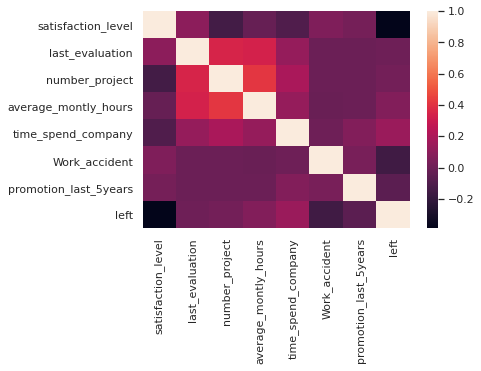

In [0]:
sns.heatmap(corr,fmt='.2f')

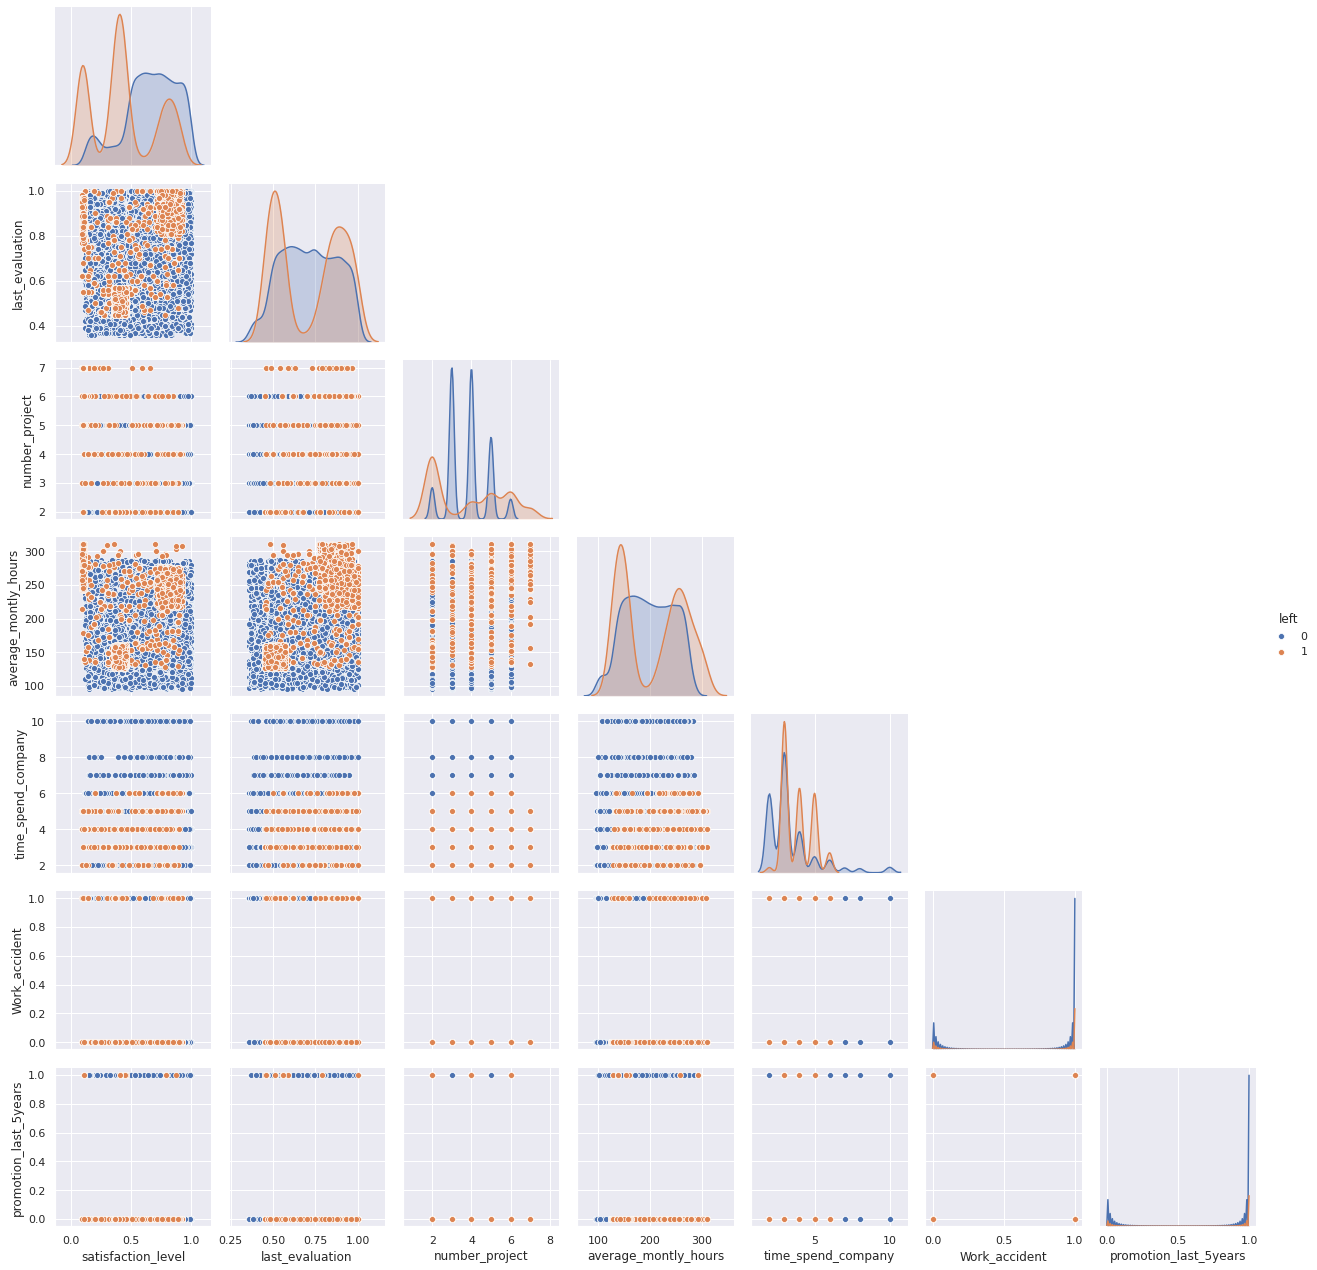

In [0]:
sns.pairplot(data= df,hue='left',corner=True)

**Dependence between Numerical and catagorical Attributes**

In [0]:
from scipy.stats import f_oneway
n_attr = ["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company"]
c_attr = ["Work_accident","promotion_last_5years","left","departmennt","salary"]
copy_df=df.copy()

count = len(copy_df['salary'].unique())
key= list(range(0,count))
dict_= dict(zip(df['salary'].unique().tolist() , key))
copy_df['salary']=copy_df['salary'].map(dict_)

count = len(copy_df['departmennt'].unique())
key= list(range(0,count))
dict_= dict(zip(df['departmennt'].unique().tolist() , key))
copy_df['departmennt']=copy_df['departmennt'].map(dict_)


for i in n_attr:
  for j in c_attr:
    if j in ['departmennt','salary']:
      if j=='salary':
        dependence =f_oneway(copy_df[copy_df[j]==0][i],copy_df[ copy_df[j]==1][i],copy_df[copy_df[j]==2][i])
      if j=='departmennt':
        dependence=f_oneway(copy_df[copy_df[j]==0][i],copy_df[ copy_df[j]==1][i],copy_df[copy_df[j]==2][i],copy_df[copy_df[j]==3][i],copy_df[ copy_df[j]==4][i],copy_df[copy_df[j]==5][i],copy_df[copy_df[j]==6][i],copy_df[copy_df[j]==7][i],copy_df[ copy_df[j]==8][i],copy_df[copy_df[j]==9][i])
    else:
      dependence=f_oneway(copy_df[copy_df[j]==0][i],copy_df[ copy_df[j]==1][i]   )
    conditon = lambda x : "Dependent" if x<0.05 else "Independent"
    print(i,'and' ,j ,'are', conditon(dependence[1]) )

satisfaction_level and Work_accident are Dependent
satisfaction_level and promotion_last_5years are Dependent
satisfaction_level and left are Dependent
satisfaction_level and departmennt are Dependent
satisfaction_level and salary are Dependent
last_evaluation and Work_accident are Independent
last_evaluation and promotion_last_5years are Independent
last_evaluation and left are Independent
last_evaluation and departmennt are Independent
last_evaluation and salary are Dependent
number_project and Work_accident are Independent
number_project and promotion_last_5years are Independent
number_project and left are Dependent
number_project and departmennt are Dependent
number_project and salary are Independent
average_montly_hours and Work_accident are Independent
average_montly_hours and promotion_last_5years are Independent
average_montly_hours and left are Dependent
average_montly_hours and departmennt are Independent
average_montly_hours and salary are Independent
time_spend_company and 

In [0]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'departmennt', 'salary', 'left'],
      dtype='object')

**Groups of employees**

In [0]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [0]:
df.groupby(['left','departmennt']).mean()

satisfaction_level  ...  promotion_last_5years
left departmennt                      ...                       
0    IT                     0.677170  ...               0.000000
     RandD                  0.653799  ...               0.040541
     accounting             0.647211  ...               0.024867
     hr                     0.666679  ...               0.028626
     management             0.654861  ...               0.122449
     marketing              0.669878  ...               0.065649
     product_mng            0.658466  ...               0.000000
     sales                  0.668548  ...               0.029750
     support                0.673799  ...               0.010155
     technical              0.668319  ...               0.012358
1    IT                     0.411868  ...               0.010989
     RandD                  0.432810  ...               0.000000
     accounting             0.402598  ...               0.000000
     hr                     0.433395  ...               0.000000
     management             0.422857  ...               0.032967
     marketing              0.453153  ...               0.000000
     product_mng            0.481566  ...               0.000000
     sales                  0.447663  ...               0.006903
     support                0.450901  ...               0.005405
     technical              0.432525  ...               0.004304

[20 rows x 7 columns]

***Data visualizations***

In [0]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'departmennt', 'salary', 'left'],
      dtype='object')

Text(0, 0.5, 'Number of people stayed or left')

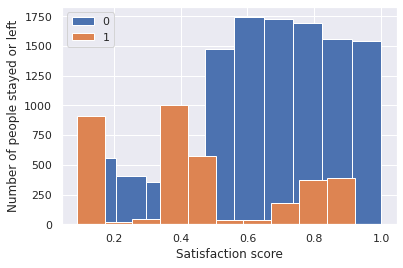

In [0]:
fig,ax=df.groupby('left')['satisfaction_level'].plot(kind='hist',legend=True)
ax.set_xlabel('Satisfaction score')
ax.set_ylabel('Number of people stayed or left')

* Employess who left the compnay have satisfaction score less than 0.5

Text(0, 0.5, 'Number of people stayed or left')

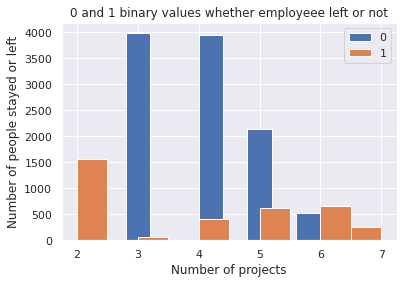

In [0]:
fig,ax=df.groupby('left')['number_project'].plot(kind='hist',legend=True)
ax.set_title('0 and 1 binary values whether employeee left or not')
ax.set_xlabel('Number of projects')
ax.set_ylabel('Number of people stayed or left')

* Employess who have done 4 and above are likely to leave company beacuse of work load


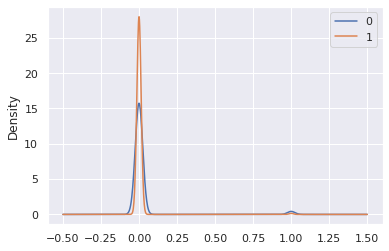

In [0]:
fig,ax=df.groupby('left')['promotion_last_5years'].plot(kind='kde',legend=True)

Text(0.5, 0, 'Years spent in compnay')

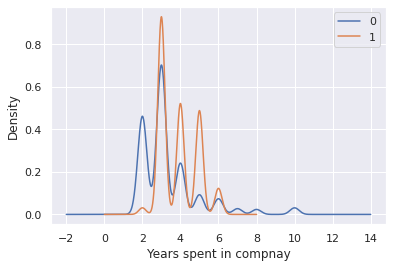

In [0]:
fig,ax=df.groupby('left')['time_spend_company'].plot(kind='kde',legend=True)
ax.set_xlabel('Years spent in compnay')

* Employess who have spent greater than 6 years are staying as a part of company due to their seniority
* Employess are most likely to leave the company when they have spent 2-4 years in company, this might be depend on how much satisfy are they on job work or salary 

Text(0.5, 0, 'Evaluation score given by company')

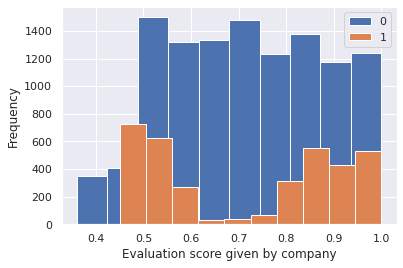

In [0]:
fig,ax=df.groupby('left')['last_evaluation'].plot(kind='hist',legend=True)
ax.set_xlabel('Evaluation score given by company')

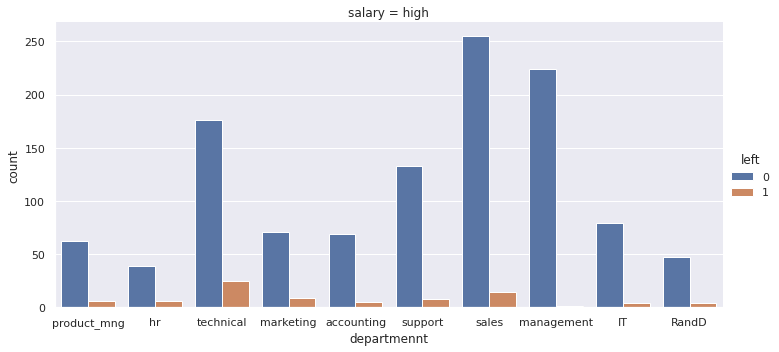

In [0]:
sns.catplot(col="salary", hue="left", x="departmennt",data=df[df.salary=='high'], kind="count",margin_titles=False,aspect=2)

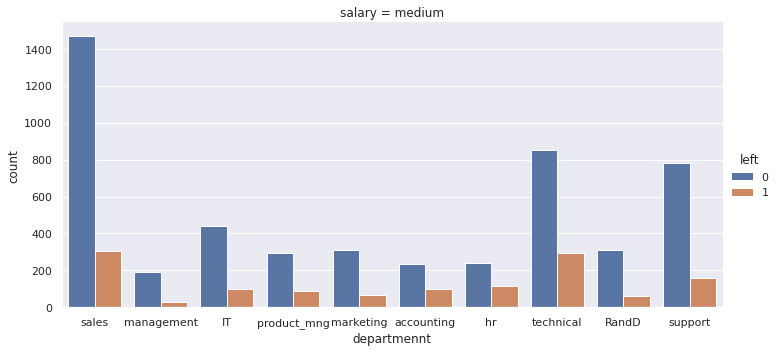

In [0]:
sns.catplot(col="salary", hue="left", x="departmennt",data=df[df.salary=='medium'], kind="count",margin_titles=False,aspect=2)

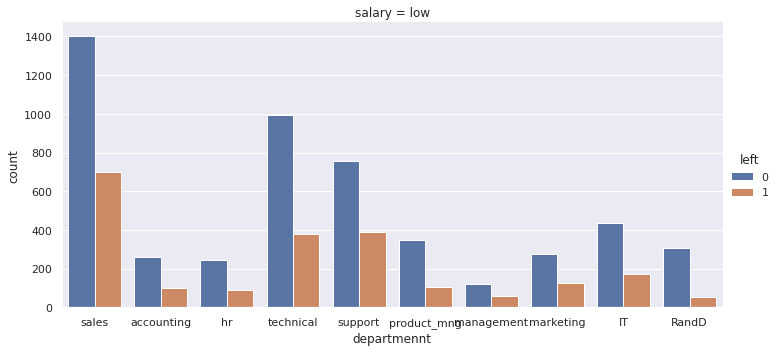

In [0]:
sns.catplot(col="salary", hue="left", x="departmennt",data=df[df.salary=='low'], kind="count",margin_titles=False,aspect=2)

left
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: average_montly_hours, dtype: object

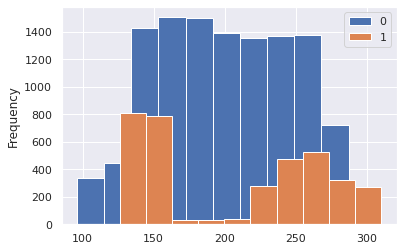

In [0]:
df.groupby('left')['average_montly_hours'].plot(kind='hist',legend=True )

* From the visualization it is clear that people with average working monthly approximatley less than 170 left the company and people with monthly working hours more than 250 left the company and in between these two peeks of hist likely to stay in company where people whose  avg monthly working hours with range of (170-210)approximatley satyed as employee of the company

* This might be due to difference of workload and they have to put extra hours to complete

Text(0.5, 1.0, 'Average monthly hours')

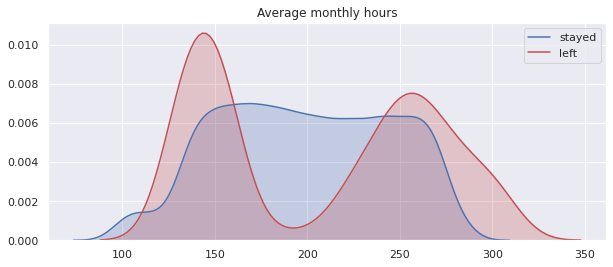

In [0]:
fig = plt.figure(figsize=(10,4))
sns.kdeplot(df.loc[(df['left'] == 0),'average_montly_hours'] , color='b',shade=True,label='stayed')
sns.kdeplot(df.loc[(df['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='left')
plt.title('Average monthly hours')

Text(0.5, 1.0, 'Last evaluation Score')

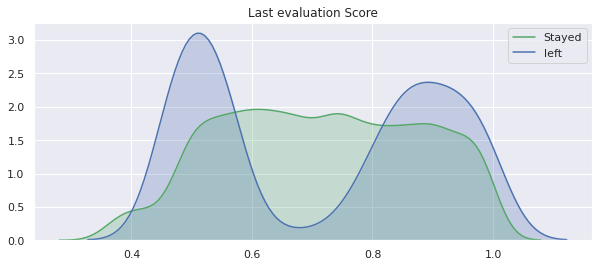

In [0]:
fig = plt.figure(figsize=(10,4),)
sns.kdeplot(df.loc[(df['left'] == 0),'last_evaluation'] , color='g',shade=True,label='Stayed')
sns.kdeplot(df.loc[(df['left'] == 1),'last_evaluation'] , color='b',shade=True, label='left')
plt.title('Last evaluation Score')

***Box plot analysis***

BOX plot with respect to number of projects and salary the employee gets from company

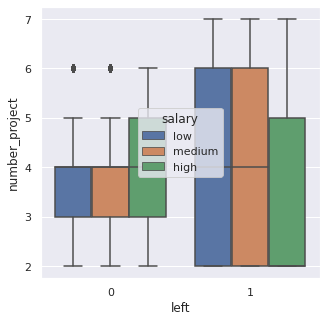

In [0]:
fig = plt.figure(figsize=(5,5),)
sns.boxplot(x='left',y='number_project',data=df,hue='salary' )

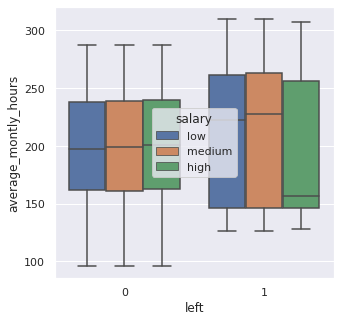

In [0]:
fig = plt.figure(figsize=(5,5),)
sns.boxplot(x='left',y='average_montly_hours',data=df,hue='salary' )

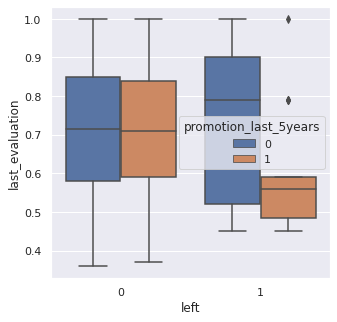

In [0]:
fig = plt.figure(figsize=(5,5),)
sns.boxplot(x='left',y='last_evaluation',data=df,hue='promotion_last_5years' )

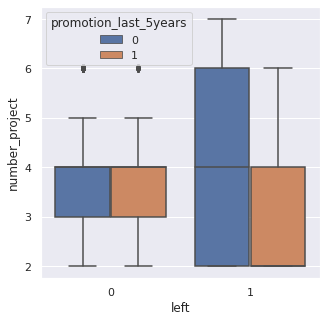

In [0]:
fig = plt.figure(figsize=(5,5),)
sns.boxplot(x='left',y='number_project',data=df,hue='promotion_last_5years' )

# ***Clustring***

Text(0.5, 0, 'K Clusters')

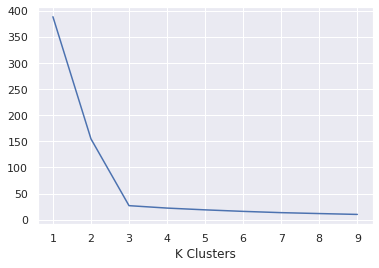

In [0]:
from sklearn.cluster import KMeans
employee_left = df[['satisfaction_level', 'last_evaluation']][df.left == 1]
N_clusters= list(range(1,10))
sum_of_square_error=[]
for i in N_clusters:
    km = KMeans(n_clusters=i,random_state=21100328,max_iter=1000).fit(employee_left)
    sum_of_square_error.append(km.inertia_)
plt.plot(N_clusters,sum_of_square_error)
plt.xlabel("K Clusters")

From elbow method we can see that number of clusters are three

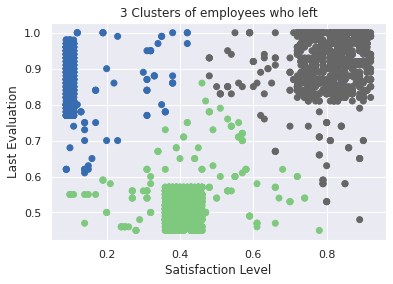

In [0]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(employee_left)
employee_left['label'] = kmeans.labels_
plt.scatter(employee_left['satisfaction_level'], employee_left['last_evaluation'], c=employee_left['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

**Hirachical relationship btween data**

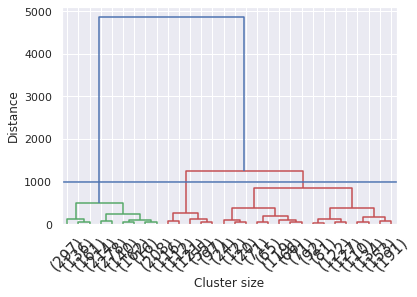

In [0]:
import scipy.cluster.hierarchy as sch
emp_left = df[['satisfaction_level', 'average_montly_hours']][df.left == 1]

Z=sch.linkage(emp_left,method='ward')
sch.dendrogram(Z,truncate_mode='lastp',p=30,leaf_rotation=45.,show_contracted=True ,leaf_font_size=15)
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.axhline(1000)
plt.show()

In [0]:
from sklearn.cluster import AgglomerativeClustering
hclusters=AgglomerativeClustering(n_clusters=3 ,affinity='euclidean',linkage='average').fit(emp_left)
emp_left['label']=np.asarray(hclusters.labels_)

No handles with labels found to put in legend.


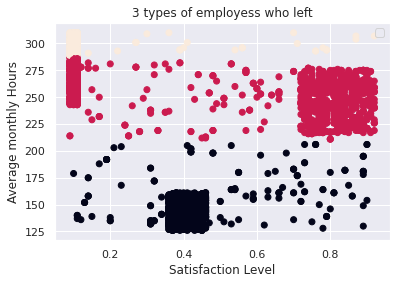

In [0]:
plt.scatter(emp_left['satisfaction_level'],emp_left['average_montly_hours'] ,c=emp_left['label'])
plt.title('3 types of employess who left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average monthly Hours')
plt.legend()
plt.show()

# Feature selection

In [0]:
onehot = pd.get_dummies(df['departmennt'])
onehot2= pd.get_dummies(df['salary'])

In [0]:
df =df.join(onehot).join(onehot2)
df.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departmennt,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,0,sales,low,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,sales,low,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
copy= df.copy()
Y=copy['left']
copy.drop(columns =['departmennt','salary','left'] ,inplace=True)
print('Total number of features.',len(copy.columns))

Total number of features. 20


In [0]:
from sklearn import preprocessing
x = copy.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled ,columns=copy.columns)

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
selector=RFE(LogisticRegression(max_iter=1000,verbose=0,fit_intercept=True),n_features_to_select=10,step=1)
selector.fit(normalized,Y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=1000,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [0]:
support = selector.support_
print(selector.support_)

[ True  True  True  True  True  True  True False  True False False False
 False False False False False  True  True False]


In [0]:
new_data =[i for i ,x in zip(normalized.columns , support) if x==True]

In [0]:
filterd_data_set = normalized[new_data]
filterd_data_set

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,high,low
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,0.0,1.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.0,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.0,0.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,0.0,1.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,0.0,0.0,0.0,1.0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,0.0,0.0,0.0,1.0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,0.0,0.0,0.0,1.0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,0.0,0.0,0.0,1.0


# ***LOGISTIC regression with respect to Retention***

In [0]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test= train_test_split(filterd_data_set ,Y ,test_size=0.3 ,random_state =21100328)

In [0]:
model1= LogisticRegression(max_iter=1000 ,verbose=0 ,fit_intercept=True)
model1.fit(X_train,y_train)
predictions = model1.predict(X_test)
accuracy =round( np.sum(predictions==y_test)/len(y_test)*100 ,3)
print('Accuracy of this model is{}%'.format(accuracy))

Accuracy of this model is77.6%


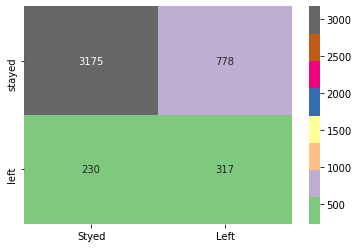

In [0]:
from sklearn.metrics import confusion_matrix
conf= confusion_matrix(predictions, y_test)
sns.heatmap(conf,annot=True,fmt='.0f',xticklabels=['Styed', 'Left'] , yticklabels= ['stayed','left'] ,cmap='Accent')